# Thompson Sampling

## Importing the libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

## Importing the dataset

In [32]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [33]:
#N = dataset.shape[0]
N = 500 # even 500 round can  obtain correct result
d = dataset.shape[1]
ads_selected = []
numbers_of_rewards_0 = [0] * d # N_i_0(n) number of times the ad i got reward 1 up to round n 
numbers_of_rewards_1 = [0] * d # N_i_1(n) number of times the ad i got reward 0 up to round n
total_reward = 0

for n in range(0, N):
    ad = 0 # for store the ad selected in each round
    max_random = 0 # maximum value of random draw
    for i in range(0, d):
        # Beata distribution
        # Theta_i(n) = Beata( N_i_1(n) + 1 , N_i_0(n) + 1 )
        random_beata = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1) # random draw
        if(random_beata > max_random):
            max_random = random_beata # update the maximum random draw
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if(reward == 0):
        numbers_of_rewards_0[ad] += 1
    else:
        numbers_of_rewards_1[ad] += 1
    total_reward += reward

## Visualising the results - Histogram

Text(0, 0.5, 'number of times ad selected')

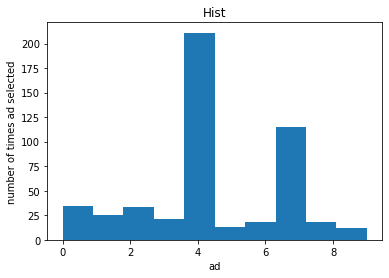

In [34]:
plt.hist(ads_selected)
plt.title("Hist")
plt.xlabel("ad")
plt.ylabel("number of times ad selected")